# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

* The grid system is controlled by traffic lights, shown as red bars at the intersections when the traffic light is green. The other cars seem to obey the traffic lights as they move through the environment. 
* The smartcab does not move durng the default ageny.py code. Rewards are given for waiting (or idling) at a red traffic light, and negative rewards are given for idling at a green traffic light. Rewards for waiting are increased (or decreased) if there is no oncoming traffic. 
* The smartcab changes location for each training trial, and the Udacity 'U' looks like it marks the destination as this also changes location.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**


**agent.py**
* verbose
    * set within '_init_()' of Environment class
    * when True, prints out additional information about the simulation, including its current status. 
* enforce_deadline 
    * Flag is set within 'env.set_primary_agent()'
    * in env.act() returns a value for penalty based on a constant ('gradient'), the 't' value and current state
    * in sim.render_text() it calculates time remaining in the current simulation 
* display
    * Flag is set within the 'def_init()' of the 'Simulator' class
    * If 'display=True', the 'render()' function is called and a graphical interface is shown based on the pygame module
    * If 'display=False', only text of the simulation is displayed.

**environment.py**
* 'act()' from the 'Environment()' class is called when an agent performs an action.
* 'act()' is called from the 'update()' function in the 'LearningAgent()' class in 'agent.py', and takes the agent's action as an argument and compares it against the environmental conditions to determine the status of the simulation (whether the game is over, whether the agent has violated traffic rules, what the reward for an action may be, etc). 


**simulator.py**
* 'render_text()' displays text of the simulation and is always called when the simulation is run.
* 'render()' enables graphics of the simulation to be displayed by calling on pygame functionality. 
* Both are called from the 'run()'function within the 'Simulator()' class
* 'render()' is only called if parameter the flag 'display=True' in 'def_init()' of the 'Simulator' class


**planner.py**
* 'next_waypoint()' will consider the East-West direction first

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


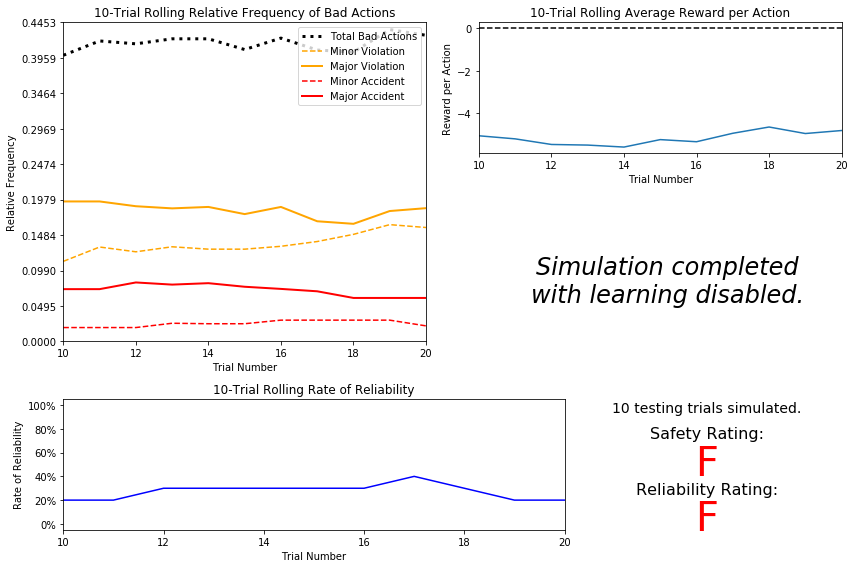

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

* The driving agent's performance reflects the fact that it is randomly choosing one of four valid actions. We can assume that a bad decision is chooisng an action that is either unreliable or unsafe. 
* c.40% of decisions are assessed as bad. Intuitively this makes sense given the number of actions available to the driving agent and the fact that sometimes other actors will present (and sometimes they won't be); and that sometimes a decision the driving agent makes will coincide correctly with the actions of the traffic light at an intersection.
* Minor violations and accidents and accidents are more common than major ones. This reflects the fact that the context in which other actors will be present to create such infringments varies with minor ones having a lower bar and therefore more likley to occur.
* Reward per action is relatively stable around the -4.5 value, and I would expect this to remain constant even with more trials, given the random nature of the the driving agent's actions. 
* The rate of reliability also makes sense. We could assume that one of the four actions will always be correct, so that over a greater number of trials the rate is 25%.
* The scores for the Testing make sensse. Given what we know, we could expect >80% failure rate on reliability and propensity for our agent to cause major accidents.
* We can conclude that the driving agent is neither safe nor reliable as it makes random guesses as to what it should do, without taking account of its external environment. This means that it would only be by (slim) chance that the driving agent could get to its destination on time and without incident. I would not travel on a car like this!

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

* Safety is the ability of the driving agent to get to it destination without accidents or running red lights. The following features are relevant:
    * 'waypoint', given that both location and heading information will determine what decision the agent will make; 
    * 'inputs' will be important to determine what decision the driving agent should make at an intersection. 


* Reliability (I am making an assumoption that efficiency in the question is the same as reliability) is the ability of the driving agent to get to its destination on time. In addition to those above):
    * 'deadline', which will help us determine the reliability of the agent. 


* This makes a case for using all of our features! So what could we remove?
    * If we assume that all other drivers will always obey the law, we could remove some or all of the 'inputs' feature. Given that US traffic laws require us to drive on the right, we could look to remove the *inputs['right']* feature as car travelling towards us will be on the opposite side of the road.  
    * I would want to include 'light' so that our agent understands what colour the light is before choosing an action. 
    * 'deadline' informs us of the number of steps left to complete our task, but increases the state space. There is a 'hard_time_limit' variable that is set when the deadline is not enforced that can act as a substitute. 
    * I think we will always need the 'waypoint' input as this determines our policy, but we can make a case for the other features to be removed to reduce the decision space. 
    
    
* In conclusion, I will opt for the following features: waypoint, and all the inputs except for 'right.'

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

* *waypoint* has 3 features (bounds, location, heading)
* *light* has 2 features [True, False]
* *inputs['left']* and *inputs['oncoming']* each has four possible features [None, 'left', 'right', 'forward']
* In total the state space is therefore: 3 x 2 x 4 x 4 = 96
* Worth noting that including *inputs['right']* would have made the state space 384!


* Could an agent learn a policy for each state given a reasonable number of trials? 
* We will need to be in each of those states at least once in order for the agent to have a reference Q value. Ideally we will need to be in each state more than once to be more certain of receiving a positive reward for an action in that state. 
* If we knew that each state would occur equally, we could say that suggest that the agent could be in each state 10 times to learn the best policy. This requires 960 steps, or nearly 50 trials if each trial has about 20 steps.
* Given that we will likely be some states more often than others, we could increase the number of trials to 75 to accomodate for under-represented states. 
* I think 75 trials is reasonable and could be run over a reasonable amount of time.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

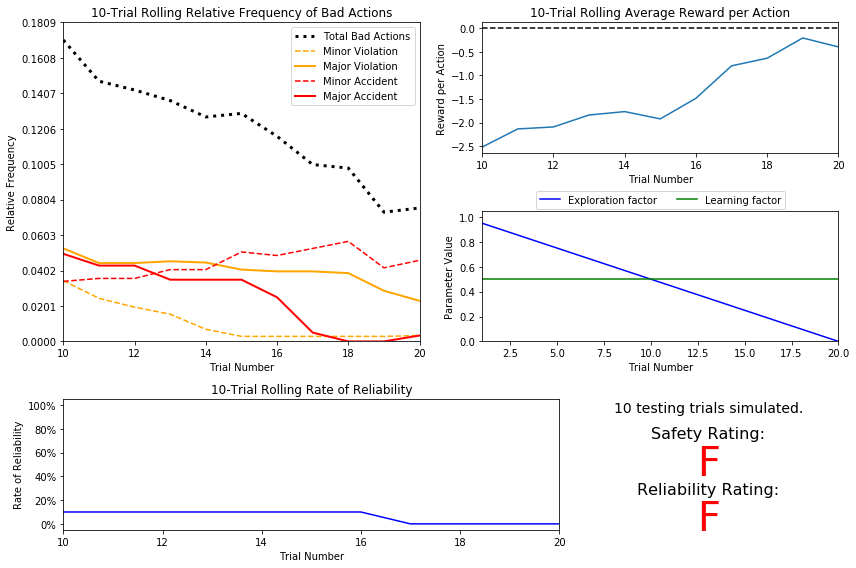

In [6]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

* Our epsilon-tolerance is set to decrease by 0.05 each time, and this is represented accurately as a straight line decay. Given its tolerance, 20 trials is the correct number for training before testing (0.05 x 20 = 1). 
* As our epsilon decreases, we become more likely to choose actions based on our maxQ values. Looking at the Q-table text file, we can see that a number of the actions for each state are stil '0.00', indicating that there has been insufficient trials for the the agent to learn an adequate policy for each state. This suggests that we are not training sufficiently long enough.
* *Similarities between the basic and Q-learning agent.* Both agents suffer from Reliability and Safety issues. This may be because of the point highlighted above, where there is insufficent policy information for the agent to act on, and therefore we have not improved performance in the agent to better than random. 
* *Differences.* The Total bad actions declines as we learn. Major violation, Major accident and Minor violation all decline as the training trials increase. Minor accidents increase, and this could indicate some learning as the agent chooses an action that leads to a Minor accident over a Major violation and Major accident. Again, the insufficient learning means that the agent can't generally choose anything better than a Minor accident choice. This requires more learning to input more positive rewards in to the Q-learning dictionary. 
* The increase in the reward per action over the 10 trial average is encouraging and also suggests some learning is taking place, and is a real contrast to the basic agent. 

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

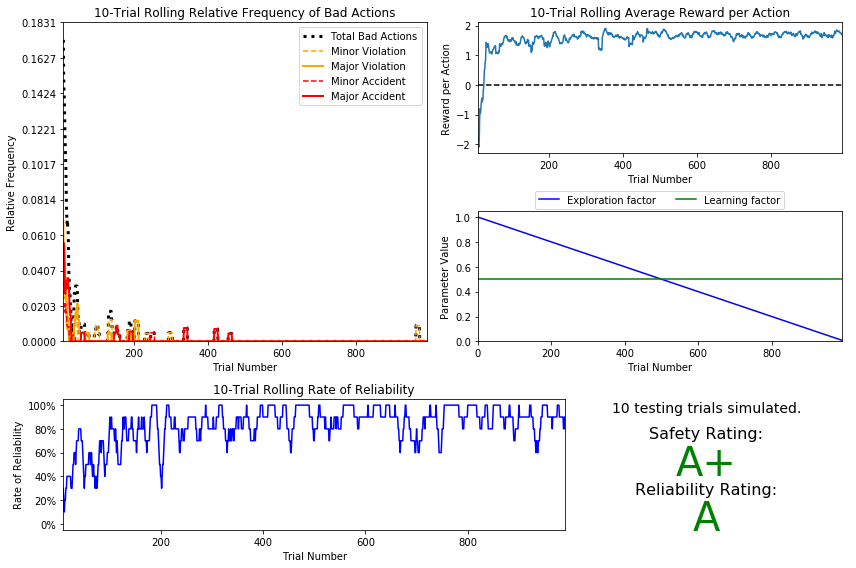

In [19]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**
* I used a few different decaying functions, but ultimately chose a linear decaying function. This is because it allowed for a reasonable amount of learning throughout a large majority of the trials. I had used an exponential decaying function, for example, and this had meant that a large part of the trials had only a small amount of learning.
* Although there are close to a 1000 trials in the simulation above, I think that most learning has been achieved by 300 trials. This is when the number of bad actions reduces to almost none. At this stage, reliability and rewards are at their high point and do not go any higher.
* I used an epsilon-tolerance of 0.01 in order to maximise the number of trials I was able to undertake. I used alpha of 0.5, or the default alpha. I had experimented with decaying the alpha, but could not satisfy myself that it made a difference to the outcome of the simulations I ran.
* This Q-Learner was significantly better than the default Q-learner. There were similarities in the sense that both had downwards trends of bad actions and both had increased rewards, but that is where the similarities end. It should be noted that the number of trials were significantly higher in the new Q-learner, but overall the safety and reliability ratings were much higher.
* From this we can suggest that the new Q-learner did learn a policy for the environment that caused it to be more successful in its trials. The results are satisfying, particularly as i spent quite a lot of time trying to figure the code out!

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

* The optimal policy is one in which the agent responds correctly to the environment they are in. This means that the rewards are maximised for the correct action in each environment state.
* Our policy depends on: the waypoint, i.e. what our next action needs to be given our destination; the status of the traffic lights (green or red); and the status of traffic on the road from oncoming or left directions.
* If the traffic is red, our policy is to remain idle unless we wish to turn right. If the traffic light is green, then we can move in our desired direction as long as there is no traffic that might cause us an accident.
    * For example, if we wish to turn left at a junction on a green light, we must check for oncoming traffic. If there is oncoming traffic, then our policy is to idle; if there is no traffic then we can go.
    * Our policy is about moving safely through the environment we have created, and this means aiminig to cause no accidents. 
    
    
** Q-table extracts**    
* This extract from the Q-table shows us correctly incentivised to wait at a red light where we do not want to turn right:

*(waypoint, light, oncoming, left)*

('forward', 'red', 'left', None)
 -- forward : -5.13
 -- None : 1.76
 -- right : -0.02
 -- left : -4.55
   
* This shows the agent incentivised to turn left on a green light: 
 
('left', 'green', 'left', 'forward')
 -- forward : 0.00
 -- None : -2.82
 -- right : -0.01
 -- left : 2.39
 
   
* This extract shows that the incentives are slightly wrong, as we should be incentivised to turn right, not to take no action:

('right', 'red', 'left', 'right')
 -- forward : 0.00
 -- None : 0.32
 -- right : 0.00
 -- left : -5.18
 
* The agent may not have learned the correct policy for this state (and for other states where the policy is not correct) because it has not spent sufficent time in these states. This means that the Q-table is not sufficiently populated to then incentivise the agent of the best policy. In the extract above, we may not have gone right during training so we do not have a value for that policy.  

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

* *Environment.* The future states involve other random actors (vehicles) which means it might be impossible for the agent to know what future states will be present in its environment when choosing its current action. If that state doesn't materialise, then the agent won't have been able to learn.
* In addition, including future rewards via a gamma would significantly increase the number of states that the agent has to learn, meaning that each state may only be encountered a minimal number of times before testing. This would make training difficult for the agent. 

* *Smartcab.* The agent is only able to understand its current state, not a future state. An understanding of future states is unlikely to have an impact on the current state given the nature of the simulation - i.e., the action we might want to take in two junctions' time is irrevelant to the traffic conditions we face at our current junction. We want the agent to make a decision based on the conditions it is experiencing now, and not take a suboptimal current action because of a potential future benefit and an overall higher Q-score as this could lead to an accident. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.